In [46]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import os
import matplotlib.pyplot as plt
import cv2
import torch
import shutil
from torchvision.ops import batched_nms
from PIL import Image
from IPython.display import Video
import yaml

In [5]:
n=0
image_folder = "/kaggle/input/traffic-dataset/traffic_wala_dataset/valid/images"
for filename in os.listdir(image_folder):
    file_path = os.path.join(image_folder, filename)

    try:
        with Image.open(file_path) as img:
            if img.mode == "RGB":
                n+=1
    except Exception as e:
        print(f"error, cant find")

print(n)


90


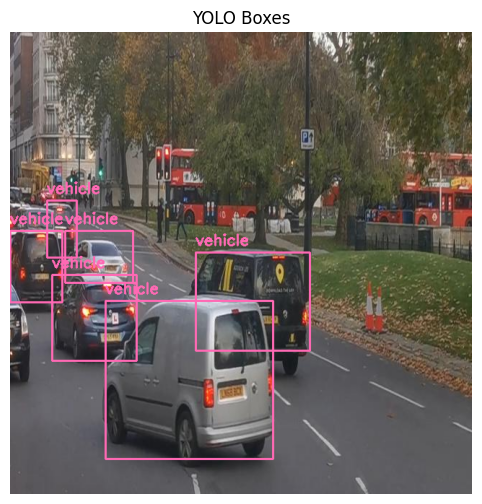

In [6]:
image_path = "/kaggle/input/traffic-dataset/traffic_wala_dataset/train/images/2_mp4-23_jpg.rf.9630295f3c98ec2ad851a859992d2527.jpg"
label_path = "/kaggle/input/traffic-dataset/traffic_wala_dataset/train/labels/2_mp4-23_jpg.rf.9630295f3c98ec2ad851a859992d2527.txt"

image = cv2.imread(image_path)
h, w = image.shape[:2]

class_names = ['vehicle']

with open(label_path, 'r') as f:
    for line in f:
        parts = line.strip().split()
        cls, x, y, bw, bh = map(float, parts)
        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)

        color = (180, 105, 255) 
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        if class_names:
            label = class_names[int(cls)]
            cv2.putText(image, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("YOLO Boxes")
plt.show()

In [8]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 22.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing insta

In [33]:
!pip install deep_sort_realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 63.9 MB/s eta 0:00:00:00:0100:01


In [9]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
yolo_data = {
    'train': '/kaggle/input/traffic-dataset/traffic_wala_dataset/train',
    'val': '/kaggle/input/traffic-dataset/traffic_wala_dataset/valid',
    'nc': 1,
    'names': ['vehicle']
}
with open('/kaggle/working/yolo_data.yaml', 'w') as f:
    yaml.dump(yolo_data, f)

print("✅ YOLO data.yaml created at /kaggle/working/yolo_data.yaml")

✅ YOLO data.yaml created at /kaggle/working/yolo_data.yaml


In [11]:
model = YOLO("yolo11n.yaml")
model = YOLO("yolo11n.pt")
model = YOLO("yolo11n.yaml").load("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 142MB/s]


Transferred 499/499 items from pretrained weights


In [8]:
results = model.train(data="/kaggle/working/yolo_data.yaml", epochs=100, batch=16, imgsz=640, save = True,optimizer = "AdamW", seed = 42,cos_lr=True,amp=True,lr0=1e-3,momentum=0.555,warmup_epochs=5,dropout=0.3,val=True, project = '/kaggle/working/runs/detect',name ='run-1')

Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/working/yolo_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.3, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.yaml, momentum=0.555, mosaic=1.0, multi_scale=False, name=run-12, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

train: Scanning /kaggle/input/traffic-dataset/traffic_wala_dataset/train/labels... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:02<00:00, 222.26it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/traffic-dataset/traffic_wala_dataset/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 106.4±21.3 MB/s, size: 51.4 KB)


val: Scanning /kaggle/input/traffic-dataset/traffic_wala_dataset/valid/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 395.62it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/traffic-dataset/traffic_wala_dataset/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/runs/detect/run-12/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.555) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/runs/detect/run-12
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.59G      1.275      1.635      1.074        116        640: 100%|██████████| 34/34 [00:07<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]

                   all         90        937     0.0314      0.905        0.7      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.85G      1.196     0.9122      1.038        206        640: 100%|██████████| 34/34 [00:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         90        937      0.274      0.977      0.846      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.87G       1.19     0.8439      1.031        135        640: 100%|██████████| 34/34 [00:05<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         90        937      0.899      0.644      0.888      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.89G      1.169     0.7949      1.021         85        640: 100%|██████████| 34/34 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         90        937      0.812      0.866      0.902      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.9G      1.174     0.7779      1.025        210        640: 100%|██████████| 34/34 [00:05<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         90        937      0.857      0.884      0.931      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.92G      1.169     0.7513      1.015         75        640: 100%|██████████| 34/34 [00:05<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]

                   all         90        937      0.888      0.875      0.945      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.93G      1.138     0.7345       1.02         94        640: 100%|██████████| 34/34 [00:05<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         90        937      0.868      0.915      0.951      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.95G      1.168     0.7719      1.028        116        640: 100%|██████████| 34/34 [00:05<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         90        937      0.833      0.886      0.936      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.96G      1.116      0.693     0.9954        161        640: 100%|██████████| 34/34 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         90        937      0.875      0.911      0.954      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.98G      1.113     0.7075      1.007        125        640: 100%|██████████| 34/34 [00:05<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]

                   all         90        937       0.87      0.905       0.95      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.99G      1.125     0.6787      1.006        113        640: 100%|██████████| 34/34 [00:05<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         90        937      0.903      0.886       0.96      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.01G      1.105     0.6803      1.002         81        640: 100%|██████████| 34/34 [00:05<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         90        937      0.881      0.908      0.956      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.02G      1.091     0.6459     0.9917         87        640: 100%|██████████| 34/34 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         90        937       0.89       0.91      0.956      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.04G      1.068     0.6277     0.9811        210        640: 100%|██████████| 34/34 [00:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all         90        937      0.902      0.896      0.962      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.05G      1.072     0.6452     0.9918         89        640: 100%|██████████| 34/34 [00:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         90        937      0.896      0.886      0.956      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.06G      1.064     0.6331      0.985        114        640: 100%|██████████| 34/34 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         90        937      0.914      0.896      0.963      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.08G      1.067     0.6263     0.9857        109        640: 100%|██████████| 34/34 [00:05<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         90        937      0.874      0.937      0.964       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.09G      1.054     0.6081     0.9758        101        640: 100%|██████████| 34/34 [00:06<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         90        937      0.905      0.907      0.967      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.11G      1.024     0.6045     0.9746         73        640: 100%|██████████| 34/34 [00:05<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]


                   all         90        937      0.846      0.924      0.951       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.12G      1.054     0.6022     0.9861         92        640: 100%|██████████| 34/34 [00:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         90        937      0.891      0.904      0.957      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.14G      1.025     0.5812     0.9673        179        640: 100%|██████████| 34/34 [00:05<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         90        937      0.896      0.914      0.954      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.15G      1.014     0.5812     0.9638        126        640: 100%|██████████| 34/34 [00:05<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         90        937      0.868       0.92      0.951       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.17G      1.026     0.6021     0.9741         81        640: 100%|██████████| 34/34 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]

                   all         90        937      0.886      0.933      0.962      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.18G      1.032     0.5834     0.9738        114        640: 100%|██████████| 34/34 [00:05<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]

                   all         90        937      0.904      0.904      0.961       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       3.2G      1.007     0.5814     0.9606        100        640: 100%|██████████| 34/34 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.79it/s]

                   all         90        937      0.892      0.907      0.958      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.21G      1.014     0.5727     0.9698        115        640: 100%|██████████| 34/34 [00:05<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]

                   all         90        937      0.915      0.886      0.953      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.23G      1.014     0.5794      0.964         97        640: 100%|██████████| 34/34 [00:06<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         90        937      0.911      0.909       0.96      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.24G      0.995     0.5635     0.9521         79        640: 100%|██████████| 34/34 [00:05<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]

                   all         90        937      0.923      0.894      0.965      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.26G     0.9998     0.5788     0.9636        125        640: 100%|██████████| 34/34 [00:05<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         90        937      0.897      0.911      0.964      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.27G      1.011     0.5598     0.9558        170        640: 100%|██████████| 34/34 [00:05<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]

                   all         90        937      0.895      0.914      0.966      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.29G      0.987     0.5541     0.9559        129        640: 100%|██████████| 34/34 [00:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]

                   all         90        937      0.912      0.913      0.969      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       3.3G      0.985      0.546     0.9508         78        640: 100%|██████████| 34/34 [00:06<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]

                   all         90        937      0.897      0.914      0.959      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.32G     0.9618     0.5434     0.9421        111        640: 100%|██████████| 34/34 [00:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         90        937      0.907      0.921      0.963       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.33G     0.9629     0.5385     0.9473        139        640: 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]

                   all         90        937      0.893      0.934      0.967      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.35G     0.9691     0.5278     0.9432         87        640: 100%|██████████| 34/34 [00:05<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         90        937       0.91      0.922      0.963      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.36G      0.971     0.5286     0.9485         96        640: 100%|██████████| 34/34 [00:05<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         90        937      0.896      0.925      0.961      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.38G     0.9659      0.527     0.9447        104        640: 100%|██████████| 34/34 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]

                   all         90        937      0.913      0.917       0.96      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.39G     0.9481     0.5285     0.9458        172        640: 100%|██████████| 34/34 [00:05<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         90        937      0.927      0.907      0.975      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.41G     0.9544       0.52      0.944        144        640: 100%|██████████| 34/34 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         90        937       0.91      0.915      0.968      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.42G     0.9386     0.5182     0.9325        100        640: 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all         90        937      0.908      0.918      0.966      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.44G     0.9509     0.5221     0.9483        105        640: 100%|██████████| 34/34 [00:06<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         90        937      0.903      0.931       0.97      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.45G     0.9484     0.5288     0.9405         77        640: 100%|██████████| 34/34 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         90        937      0.889      0.904       0.95       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.46G     0.9537       0.52     0.9488        126        640: 100%|██████████| 34/34 [00:05<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]

                   all         90        937       0.92      0.914      0.969      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.48G     0.9327     0.5109     0.9362        117        640: 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]

                   all         90        937      0.905      0.934      0.964      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.49G     0.9225     0.5082     0.9312        117        640: 100%|██████████| 34/34 [00:05<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]

                   all         90        937      0.918      0.932      0.967       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.51G     0.9104     0.4995      0.937        133        640: 100%|██████████| 34/34 [00:05<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         90        937      0.903      0.942      0.969      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.52G     0.9205     0.5018     0.9327        214        640: 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]

                   all         90        937      0.931      0.908      0.968      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.54G     0.9188     0.4988      0.931        112        640: 100%|██████████| 34/34 [00:05<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         90        937      0.923      0.911       0.97      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.55G     0.9171     0.4998     0.9379         90        640: 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]

                   all         90        937      0.908      0.927      0.971      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.57G     0.9112     0.4947      0.931        116        640: 100%|██████████| 34/34 [00:05<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         90        937       0.93      0.922      0.973      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.58G     0.8983     0.4992     0.9318         30        640: 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]

                   all         90        937      0.916       0.91      0.962      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.78G     0.8999     0.4867     0.9285        111        640: 100%|██████████| 34/34 [00:05<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         90        937      0.909      0.943      0.969      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       3.8G     0.8997     0.4886     0.9275        147        640: 100%|██████████| 34/34 [00:06<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         90        937      0.904      0.938      0.967      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.81G     0.9039     0.4834     0.9275        193        640: 100%|██████████| 34/34 [00:05<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         90        937       0.92      0.926      0.972      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.83G     0.8846     0.4763     0.9212        146        640: 100%|██████████| 34/34 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all         90        937      0.914      0.925      0.971       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.84G     0.8889     0.4811     0.9281        133        640: 100%|██████████| 34/34 [00:05<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         90        937      0.939      0.908      0.969      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.86G     0.8866     0.4749     0.9297         65        640: 100%|██████████| 34/34 [00:05<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         90        937      0.903      0.925      0.969      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.87G     0.8824     0.4766     0.9181        155        640: 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]

                   all         90        937      0.885      0.927      0.962      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.88G     0.8896     0.4775     0.9229        101        640: 100%|██████████| 34/34 [00:05<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]

                   all         90        937      0.911      0.931      0.963      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       3.9G     0.8753     0.4713      0.925         77        640: 100%|██████████| 34/34 [00:06<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         90        937      0.918      0.933       0.96      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.91G     0.8704     0.4643     0.9186        135        640: 100%|██████████| 34/34 [00:05<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         90        937      0.903      0.943      0.968       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.93G     0.8728     0.4596     0.9205         93        640: 100%|██████████| 34/34 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         90        937      0.931      0.917       0.97      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.95G     0.8659     0.4613     0.9194        110        640: 100%|██████████| 34/34 [00:05<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         90        937      0.901      0.931      0.969      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.96G     0.8496     0.4494      0.909        195        640: 100%|██████████| 34/34 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         90        937      0.908      0.934      0.971      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.97G     0.8678     0.4554     0.9185         90        640: 100%|██████████| 34/34 [00:05<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         90        937      0.903      0.939      0.967      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.99G       0.85     0.4563     0.9093        125        640: 100%|██████████| 34/34 [00:05<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         90        937      0.915      0.932      0.967       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         4G     0.8468     0.4404     0.9085        122        640: 100%|██████████| 34/34 [00:05<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]


                   all         90        937      0.924      0.921      0.965       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.02G     0.8413     0.4403     0.9125        100        640: 100%|██████████| 34/34 [00:05<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         90        937      0.899       0.95      0.967      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.03G     0.8521     0.4507     0.9139        107        640: 100%|██████████| 34/34 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         90        937       0.91      0.935      0.963       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.05G     0.8308     0.4477     0.9051        135        640: 100%|██████████| 34/34 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]

                   all         90        937      0.909      0.934      0.968      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.06G     0.8531     0.4435     0.9128        113        640: 100%|██████████| 34/34 [00:05<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         90        937      0.909       0.94       0.97      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.08G     0.8362     0.4404     0.9084        133        640: 100%|██████████| 34/34 [00:05<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]

                   all         90        937       0.91       0.93      0.966      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.09G     0.8239     0.4367     0.9019        164        640: 100%|██████████| 34/34 [00:05<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

                   all         90        937      0.917      0.931      0.965      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.11G     0.8255     0.4316     0.9055         89        640: 100%|██████████| 34/34 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]

                   all         90        937      0.922       0.92      0.965      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.12G     0.8247     0.4359     0.9048        103        640: 100%|██████████| 34/34 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         90        937      0.925      0.917      0.964      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.14G     0.8217     0.4421     0.9022        102        640: 100%|██████████| 34/34 [00:06<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]

                   all         90        937      0.926      0.916      0.967      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.15G     0.8142      0.428      0.906         83        640: 100%|██████████| 34/34 [00:05<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         90        937      0.914      0.925      0.965      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.17G     0.8177     0.4302     0.9028        106        640: 100%|██████████| 34/34 [00:05<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         90        937        0.9      0.931      0.961      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.18G     0.8092      0.423     0.9009        105        640: 100%|██████████| 34/34 [00:06<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         90        937      0.915      0.935      0.961      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       4.2G     0.8066     0.4285     0.9015        107        640: 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]

                   all         90        937      0.909      0.941      0.965       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.21G     0.7985     0.4225     0.8997        110        640: 100%|██████████| 34/34 [00:05<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]

                   all         90        937      0.921      0.934      0.966      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.23G     0.8076     0.4293     0.9026         96        640: 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         90        937      0.912      0.936      0.967      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.24G     0.8009     0.4258     0.9014        126        640: 100%|██████████| 34/34 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]

                   all         90        937      0.915      0.933      0.965      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.26G     0.8078     0.4209     0.9038         93        640: 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all         90        937      0.898      0.941      0.965      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.27G     0.7985     0.4193     0.8935        156        640: 100%|██████████| 34/34 [00:06<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]

                   all         90        937      0.923      0.918      0.964       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.29G     0.7917     0.4106     0.8942        136        640: 100%|██████████| 34/34 [00:05<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         90        937      0.912      0.927      0.965      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       4.3G     0.7925     0.4163     0.8945        116        640: 100%|██████████| 34/34 [00:05<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]

                   all         90        937      0.923      0.923      0.963      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.31G     0.7872      0.417     0.8947        125        640: 100%|██████████| 34/34 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         90        937      0.909      0.937      0.965      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.33G     0.7868     0.4121     0.8902        116        640: 100%|██████████| 34/34 [00:05<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         90        937      0.925      0.914      0.964      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.34G     0.7927      0.415     0.8972        140        640: 100%|██████████| 34/34 [00:05<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         90        937      0.917      0.928      0.964       0.73


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.36G     0.7723      0.396      0.898         95        640: 100%|██████████| 34/34 [00:06<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         90        937      0.922      0.928      0.961      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.37G     0.7748     0.3922     0.8909         83        640: 100%|██████████| 34/34 [00:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]

                   all         90        937      0.917      0.928      0.962      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.39G     0.7665     0.3932     0.9027         88        640: 100%|██████████| 34/34 [00:05<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         90        937      0.913      0.929      0.962      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       4.4G      0.763     0.3877      0.893         75        640: 100%|██████████| 34/34 [00:05<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]

                   all         90        937      0.901      0.943      0.962      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.42G     0.7509     0.3852      0.884         68        640: 100%|██████████| 34/34 [00:05<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]

                   all         90        937      0.903      0.939      0.962      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.43G     0.7619     0.3872      0.895         62        640: 100%|██████████| 34/34 [00:05<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         90        937      0.908      0.937      0.962      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.45G     0.7611     0.3855     0.8889         71        640: 100%|██████████| 34/34 [00:05<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]

                   all         90        937      0.907       0.94      0.962      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.46G     0.7593     0.3865     0.8898         59        640: 100%|██████████| 34/34 [00:05<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         90        937      0.907      0.937      0.963      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.48G     0.7559     0.3791     0.8889        130        640: 100%|██████████| 34/34 [00:05<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         90        937      0.907      0.937      0.962      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.49G     0.7631     0.3903     0.8888         91        640: 100%|██████████| 34/34 [00:05<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]

                   all         90        937      0.902      0.942      0.962      0.727



100 epochs completed in 0.193 hours.
Optimizer stripped from /kaggle/working/runs/detect/run-12/weights/last.pt, 5.5MB
Optimizer stripped from /kaggle/working/runs/detect/run-12/weights/best.pt, 5.5MB

Validating /kaggle/working/runs/detect/run-12/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.931      0.916       0.97      0.738
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /kaggle/working/runs/detect/run-12


In [9]:
results = model('/kaggle/input/traffic-dataset/traffic_wala_dataset/valid/images', save=True, save_txt=True, save_conf=True)


image 1/90 /kaggle/input/traffic-dataset/traffic_wala_dataset/valid/images/10_mp4-0_jpg.rf.08b3bd34bbb73fb80c2d662c34474a98.jpg: 640x640 24 vehicles, 10.2ms
image 2/90 /kaggle/input/traffic-dataset/traffic_wala_dataset/valid/images/10_mp4-13_jpg.rf.aff71e875ee297d3086b715b7d6aaf26.jpg: 640x640 29 vehicles, 9.1ms
image 3/90 /kaggle/input/traffic-dataset/traffic_wala_dataset/valid/images/10_mp4-16_jpg.rf.b01cbf556a5a2c4154322deda0339880.jpg: 640x640 28 vehicles, 9.0ms
image 4/90 /kaggle/input/traffic-dataset/traffic_wala_dataset/valid/images/10_mp4-23_jpg.rf.13b084ba8417c6d0aaf5d4c35ddba6ac.jpg: 640x640 30 vehicles, 9.2ms
image 5/90 /kaggle/input/traffic-dataset/traffic_wala_dataset/valid/images/10_mp4-25_jpg.rf.11c919cc683cc6a0d0a658be13483748.jpg: 640x640 30 vehicles, 8.8ms
image 6/90 /kaggle/input/traffic-dataset/traffic_wala_dataset/valid/images/10_mp4-31_jpg.rf.0daa09b648954e3a19824a49ad49876e.jpg: 640x640 32 vehicles, 9.0ms
image 7/90 /kaggle/input/traffic-dataset/traffic_wala_dat

In [17]:
model_for_val = YOLO('/kaggle/input/best-weights/best.pt')  

metrics = model_for_val.val(
    data='/kaggle/working/yolo_data.yaml',  
    imgsz=640,                  
    batch=16,                      
    save=True,                     
    save_txt=True,                 
    save_conf=True,
)


Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.2 ms, read: 106.1±26.4 MB/s, size: 59.4 KB)


val: Scanning /kaggle/input/traffic-dataset/traffic_wala_dataset/valid/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 786.45it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/traffic-dataset/traffic_wala_dataset/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:18<00:00,  3.16s/it]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.931      0.917       0.97      0.739
Speed: 5.8ms preprocess, 176.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val2


In [18]:
print(f"map50:,{metrics.box.map50:.4f}")

map50:,0.9698


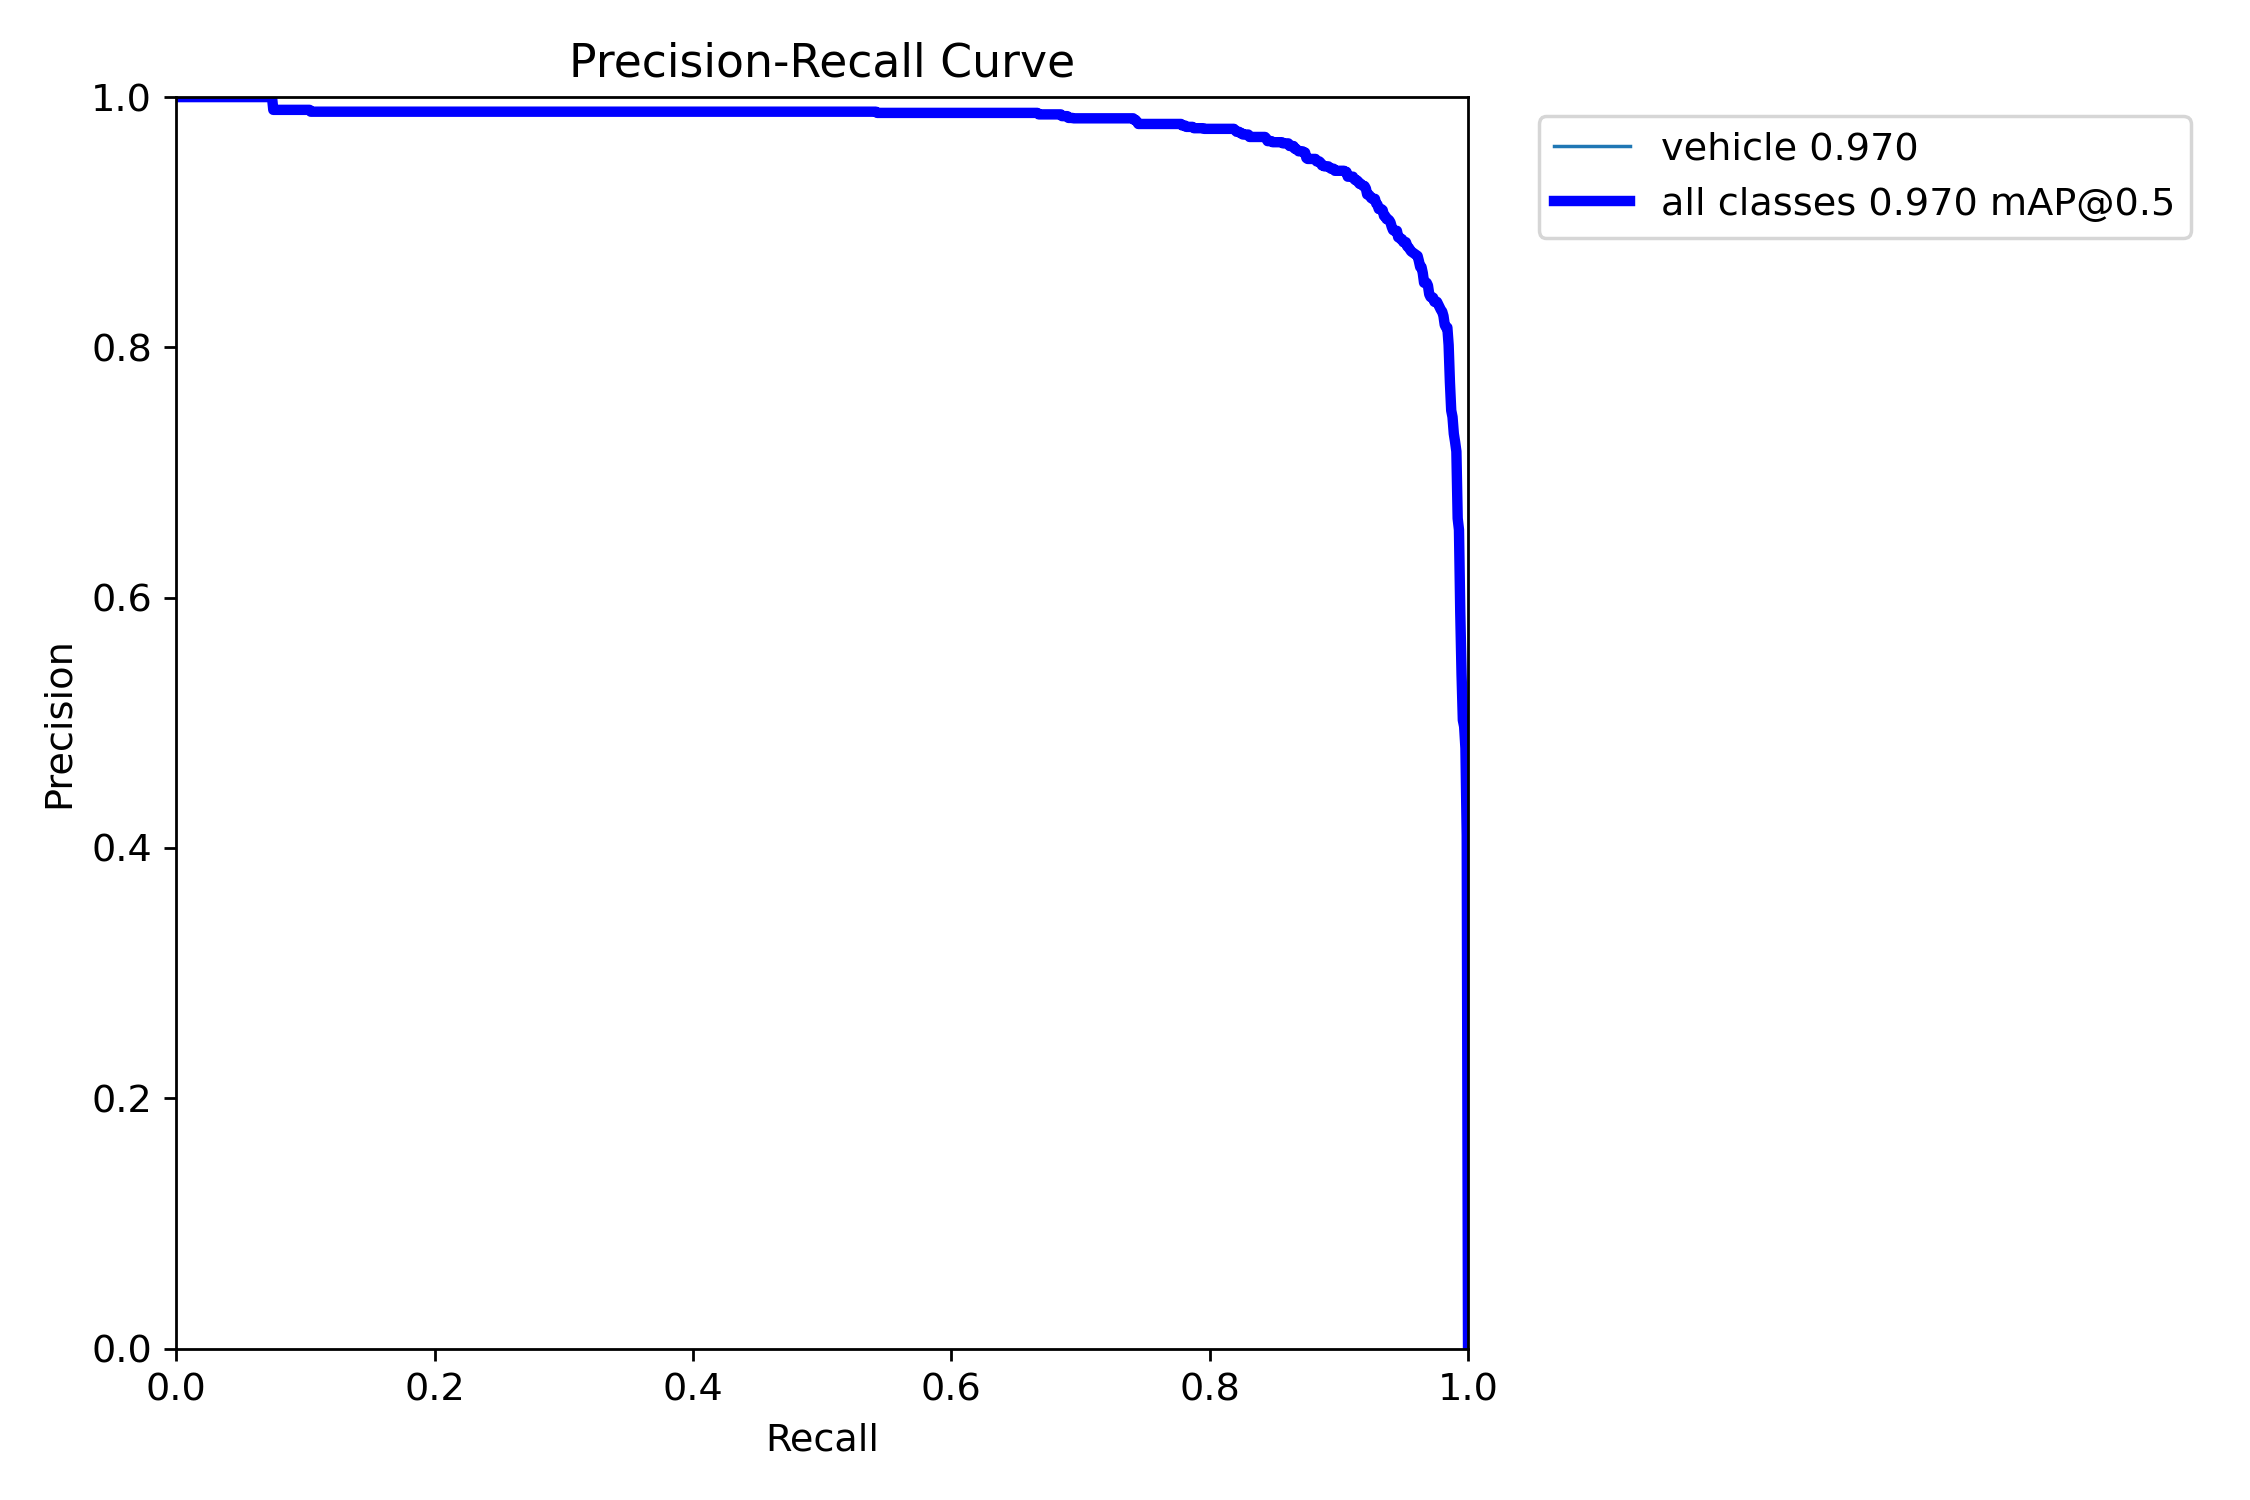

In [25]:
Image.open('/kaggle/working/runs/detect/val2/PR_curve.png')

In [29]:
shutil.make_archive("/kaggle/working/validation_results",'zip', "/kaggle/working/runs/detect/val2")

'/kaggle/working/validation_results.zip'

# ***FINE-TUNED YOLOV8 + BYETRACK IN BUILT FOR VIDEO***

In [45]:
model = YOLO("/kaggle/input/best-weights/best.pt")
video_path = "/kaggle/input/test-video/traffic_aims_required.mp4"
cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"🎥 FPS: {fps}, Size: {width}x{height}, Total frames: {total_frames}")

out = cv2.VideoWriter("video_output_global_yolo_basic.mp4",
                      cv2.VideoWriter_fourcc(*'mp4v'),
                      fps, (width, height))

frame_num = 0
vehicle_counts = []
window = 5
line_y = int(height * 0.8)
offset = 20
counted_ids = set()
global_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.track(frame, persist=True, conf=0.3, verbose=False)
    num_vehicles = len(results[0].boxes) if results[0].boxes else 0

    vehicle_counts.append(num_vehicles)
    if len(vehicle_counts) > window:
        vehicle_counts.pop(0)
    smooth_count = int(sum(vehicle_counts) / len(vehicle_counts))

    annotated_frame = results[0].plot(labels=False, conf=False)

    if results[0].boxes.id is not None:
        ids = results[0].boxes.id.int().tolist()
        boxes = results[0].boxes.xywh.cpu().numpy()

        for i, box in enumerate(boxes):
            cx, cy = int(box[0]), int(box[1])
            obj_id = ids[i]

            if abs(cy - line_y) < offset and obj_id not in counted_ids:
                counted_ids.add(obj_id)
                global_count += 1

            cv2.circle(annotated_frame, (cx, cy), 5, (0, 0, 255), -1)
            cv2.putText(annotated_frame, str(obj_id), (cx, cy - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

   
    cv2.line(annotated_frame, (0, line_y), (width, line_y), (255, 0, 255), 2)

    
    cv2.putText(annotated_frame, f"Vehicles : {smooth_count}", (20, 50),
                cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.2, (180, 105, 255), 3)
    cv2.putText(annotated_frame, f"Global Count: {global_count}", (20, 100),
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (150, 80, 255), 3)

    out.write(annotated_frame)
    frame_num += 1

cap.release()
out.release()

Video("video_output_global_yolo.mp4", embed=True)

🎥 FPS: 30.0, Size: 1280x720, Total frames: 900
